<a href="https://colab.research.google.com/github/efthymios19/Phydrus_GoogleColab/blob/main/Examples/Hydrus_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Παραδείγμα 2 HYDRUS

In [1]:
!rm -rf /content/Phydrus_GoogleColab
# Clone the repository
!git clone https://github.com/efthymios19/Phydrus_GoogleColab.git

# Make the mf6 file executable
!chmod +x /content/Phydrus_GoogleColab/bin/hydrus_1

# To avoid some Google Colab unconvenients
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



Cloning into 'Phydrus_GoogleColab'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 38 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 652.02 KiB | 2.68 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
!pip install phydrus

In [8]:
import os
import phydrus as ps
import pandas as pd
%matplotlib inline

In [4]:
# Folder for Hydrus files to be stored
ws = '/content/Phydrus_GoogleColab/modelFiles' #use particular names
exe = '/content/Phydrus_GoogleColab/bin/hydrus_1'
# Description
desc = "Infiltration of Water into a Two-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc,
              mass_units="mmol", time_unit="days", length_unit="cm")
ml.basic_info["lFlux"] = True
ml.basic_info["lShort"] = False

time = [2, 4, 5, 6, 10, 20]
ml.add_time_info(tmax=20, print_array=time, dt=0.001, dtmax=0.1)



INFO: Directory /content/Phydrus_GoogleColab/modelFiles created
INFO:phydrus.model:Directory /content/Phydrus_GoogleColab/modelFiles created


[2, 4, 5, 6, 10, 20]

In [5]:
ml.add_waterflow(model=3, top_bc=2, bot_bc=6)

m = ml.get_empty_material_df(n=2)
m.loc[[1, 2]] = [[0.095, 0.41, 0.019, 1.31, 6.24, 0.5],
                 [0.065, 0.41, 0.075, 1.89, 106.1, 0.5]]
ml.add_material(m)

In [6]:
nodes = 100  # Disctretize soil column into n elements
depth = [-51, -100]  # Depth of the soil column
ihead = -100  # Determine initial Pressure Head
# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth[-1] / nodes), h=ihead, mat=m.index)
ml.add_profile(profile)  # Add the profile

/usr/local/lib/python3.11/dist-packages/phydrus/profile.py:73: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna("")


In [7]:
# Add observation nodes at depth
ml.add_obs_nodes([0, -50, -100])

In [9]:
time = (2, 5, 7, 10, 20)
bc = {"tAtm": time, "Prec": (6, 10, 2, 0, 0), "rSoil": (0, 0, 0, 0, 1)}
atm = pd.DataFrame(bc, index=time)
ml.add_atmospheric_bc(atm, hcrits=3, hcrita=50000)


In [10]:
ml.write_input()
ml.simulate()

INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/SELECTOR.IN
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/SELECTOR.IN
INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/PROFILE.DAT
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/PROFILE.DAT
INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/ATMOSPH.IN
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/ATMOSPH.IN
INFO: Hydrus-1D Simulation Successful.
INFO:phydrus.model:Hydrus-1D Simulation Successful.


CompletedProcess(args=['/content/Phydrus_GoogleColab/bin/hydrus_1', '/content/Phydrus_GoogleColab/modelFiles', '-1'], returncode=0)

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:259: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = read_csv(path, skiprows=start, index_col=0, nrows=end - start - 1,


(-100.0, 10.0)

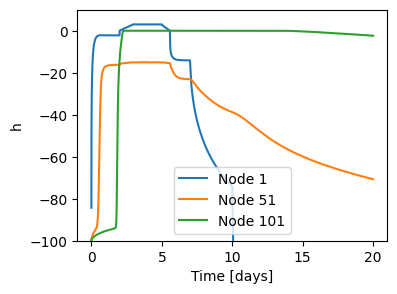

In [11]:
import matplotlib.pyplot as plt
dfs = ml.read_obs_node()
fig, ax = plt.subplots(figsize=(4,3))
for i, df in dfs.items():
    name = "Node {}".format(i)
    df.plot(y="h", ax=ax, label=name, use_index=True)
ax.set_xlabel("Time [{}]".format(ml.basic_info["TUnit"]))
ax.set_ylabel("h")
ax.set_ylim(-100, 10)

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,


<Axes: xlabel='h [cm]', ylabel='Depth [cm]'>

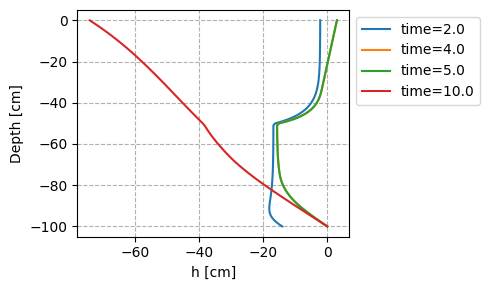

In [12]:
ml.plots.profile_information(times=[2.0, 4.0, 5.0, 10.0])

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:320: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[time] = read_csv(file, skiprows=s,


<Axes: xlabel='Theta [-]', ylabel='Depth [cm]'>

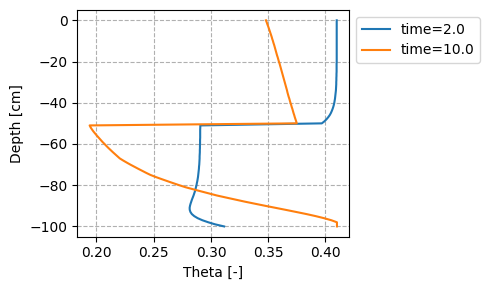

In [13]:
ml.plots.profile_information("Water Content", times=[2.0, 10.0])

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:214: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = read_csv(file, skiprows=s, nrows=e - s - 2, usecols=usecols,
/usr/local/lib/python3.11/dist-packages/phydrus/read.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.drop(index=data.index[0]).apply(to_numeric,


array([<Axes: xlabel='Time [days]', ylabel='Bottom Flux'>,
       <Axes: xlabel='Time [days]', ylabel='Cum. Bottom Flux'>],
      dtype=object)

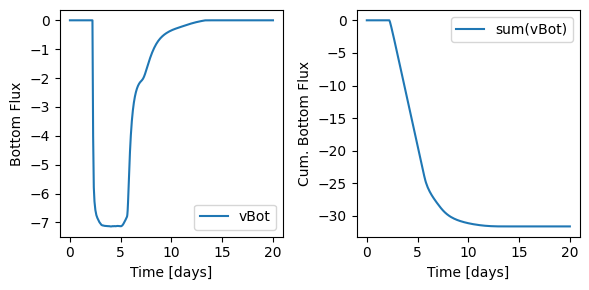

In [14]:
ml.plots.water_flow(data="Bottom Flux")